## 입장객 수 데이터 전처리

In [151]:
import pandas as pd

file_path = 'C:/Users/Moai/Seoul GrandPark/Data/입장객수.xlsx'

peo_data = pd.read_excel(file_path)

peo_data['date'] = pd.to_datetime(peo_data['date'])
peo_data.set_index('date', inplace = True)
peo_data

,입장객 수
date,
2017-04-01,17070.0
2017-04-02,32457.0
2017-04-03,3032.0
2017-04-04,3576.0
2017-04-05,1067.0
...,...
2019-12-27,1302.0
2019-12-28,2110.0
2019-12-29,6913.0


### 결측치 확인

In [152]:
print(peo_data.isnull().sum().sum())

1


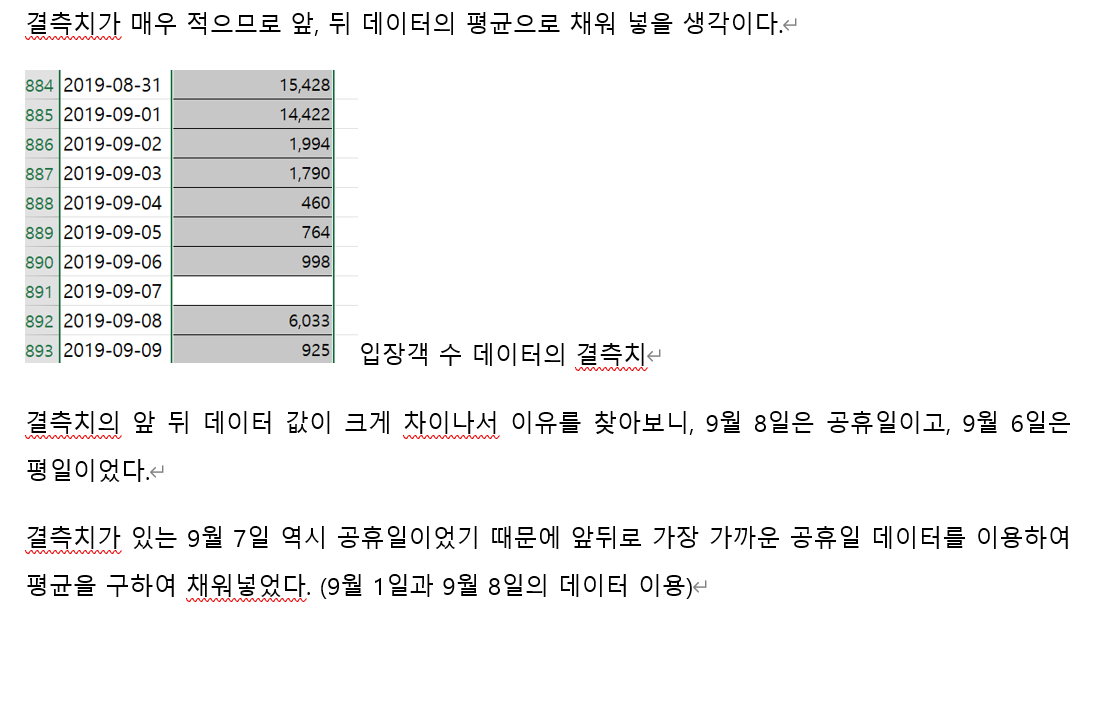

In [153]:
peo_data[peo_data.isnull().any(axis = 1)].index

DatetimeIndex(['2019-09-07'], dtype='datetime64[ns]', name='date', freq=None)

In [154]:
import numpy as np
mean = round(np.mean([peo_data['입장객 수'].iloc[883],peo_data['입장객 수'].iloc[890]]))

peo_data['입장객 수'].iloc[889] = mean


## 날씨 데이터 전처리

In [155]:
file_path = 'C:/Users/Moai/Seoul GrandPark/Data/날씨데이터.xlsx'

wea_data = pd.read_excel(file_path)

wea_data['date'] = pd.to_datetime(wea_data['date'])
wea_data.set_index('date', inplace = True)

wea_data

,pm10,pm2.5,o3,no2,co,so2,기온(°C),풍속(m/s),강수량(mm),습도(%)
date,,,,,,,,,,
2017-04-01,25,NaN,0.024,0.026,0.5,0.003,8.641667,1.837500,0.000000,56.541667
2017-04-02,46,NaN,0.035,0.021,0.6,0.004,7.912500,2.162500,0.000000,52.875000
2017-04-03,77,NaN,0.036,0.035,0.7,0.005,10.837500,2.687500,0.000000,43.541667
2017-04-04,68,NaN,0.031,0.042,0.7,0.005,12.245833,1.516667,0.000000,39.083333
2017-04-05,44,NaN,0.018,0.041,0.6,0.004,11.941667,1.112500,1.416667,55.875000
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,30,18.0,0.018,0.026,0.6,0.002,-0.579167,1.375000,0.000000,59.666667
2019-12-28,47,23.0,0.007,0.035,0.9,0.004,0.262500,0.579167,0.000000,70.833333
2019-12-29,46,28.0,0.007,0.033,0.9,0.003,3.300000,0.833333,0.020833,70.875000


### 결측치 비율 확인

In [156]:
print(((wea_data.isnull().sum())/len(wea_data))*100)

pm10        0.000000
pm2.5      24.676617
o3          0.000000
no2         0.000000
co          0.000000
so2         0.000000
기온(°C)      0.000000
풍속(m/s)     0.000000
강수량(mm)     0.000000
습도(%)       0.000000
dtype: float64


In [157]:
# pm2.5의 결측치 비율이 높기 때문에 회귀분석을 사용하여 결측치 처리
correlation_matrix = wea_data.corr(method = 'pearson')

print(correlation_matrix)

             pm10     pm2.5        o3       no2        co       so2    기온(°C)  \
pm10     1.000000  0.858782  0.106679  0.497128  0.544488  0.553014 -0.246448   
pm2.5    0.858782  1.000000 -0.143306  0.632578  0.743018  0.637252 -0.366676   
o3       0.106679 -0.143306  1.000000 -0.423593 -0.440214 -0.143098  0.453657   
no2      0.497128  0.632578 -0.423593  1.000000  0.762156  0.569330 -0.416384   
co       0.544488  0.743018 -0.440214  0.762156  1.000000  0.707609 -0.611475   
so2      0.553014  0.637252 -0.143098  0.569330  0.707609  1.000000 -0.575808   
기온(°C)  -0.246448 -0.366676  0.453657 -0.416384 -0.611475 -0.575808  1.000000   
풍속(m/s) -0.073785 -0.258593  0.422138 -0.524455 -0.442067 -0.144910  0.076502   
강수량(mm) -0.217090 -0.163462 -0.091939 -0.176961 -0.168282 -0.235095  0.174712   
습도(%)   -0.289527 -0.171939 -0.176891 -0.128110 -0.133376 -0.467421  0.483242   

          풍속(m/s)   강수량(mm)     습도(%)  
pm10    -0.073785 -0.217090 -0.289527  
pm2.5   -0.258593 -0.163462 

In [158]:
from sklearn.linear_model import LinearRegression
without_null = wea_data.dropna(subset=['pm2.5'])
X_train = without_null[['pm10','co']]
y_train = without_null['pm2.5']

model = LinearRegression()

model.fit(X_train, y_train)

null_values = wea_data['pm2.5'].isna()
X_test = wea_data.loc[null_values,['pm10', 'co']]

y_pred = model.predict(X_test)

wea_data.loc[null_values, 'pm2.5'] = y_pred

wea_data

,pm10,pm2.5,o3,no2,co,so2,기온(°C),풍속(m/s),강수량(mm),습도(%)
date,,,,,,,,,,
2017-04-01,25,12.241500,0.024,0.026,0.5,0.003,8.641667,1.837500,0.000000,56.541667
2017-04-02,46,25.930316,0.035,0.021,0.6,0.004,7.912500,2.162500,0.000000,52.875000
2017-04-03,77,44.903672,0.036,0.035,0.7,0.005,10.837500,2.687500,0.000000,43.541667
2017-04-04,68,40.147587,0.031,0.042,0.7,0.005,12.245833,1.516667,0.000000,39.083333
2017-04-05,44,24.873408,0.018,0.041,0.6,0.004,11.941667,1.112500,1.416667,55.875000
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,30,18.000000,0.018,0.026,0.6,0.002,-0.579167,1.375000,0.000000,59.666667
2019-12-28,47,23.000000,0.007,0.035,0.9,0.004,0.262500,0.579167,0.000000,70.833333
2019-12-29,46,28.000000,0.007,0.033,0.9,0.003,3.300000,0.833333,0.020833,70.875000


### 다중공선성 확인

In [159]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['variable'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_data = calculate_vif(wea_data)
vif_data

,variable,VIF
0,pm10,21.576542
1,pm2.5,15.034398
2,o3,8.748717
3,no2,18.856186
4,co,44.458018
5,so2,22.351310
6,기온(°C),8.592819
7,풍속(m/s),6.514661
8,강수량(mm),1.331575
9,습도(%),26.705797


In [161]:
def removal_high_vif(df, threshold = 10):
    while True:

        df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()
        vif_data = calculate_vif(df_cleaned)
        max_vif = vif_data['VIF'].max()
        if max_vif >= threshold:
            max_vif_column = vif_data.loc[vif_data['VIF'] == max_vif, 'variable'].values[0]

            print(f"Removing column '{max_vif_column}' with VIF: {max_vif}")
            df = df.drop(columns=[max_vif_column])

        else:
            break

    return vif_data

vif_data_removal = removal_high_vif(wea_data)

wea_data = wea_data[vif_data_removal['variable']]

wea_data

Removing column 'co' with VIF: 44.45801799632379
Removing column 'pm10' with VIF: 21.57572848224037
Removing column 'so2' with VIF: 16.893757813616077
Removing column '습도(%)' with VIF: 16.262350451815045


,pm2.5,o3,no2,기온(°C),풍속(m/s),강수량(mm)
date,,,,,,
2017-04-01,12.241500,0.024,0.026,8.641667,1.837500,0.000000
2017-04-02,25.930316,0.035,0.021,7.912500,2.162500,0.000000
2017-04-03,44.903672,0.036,0.035,10.837500,2.687500,0.000000
2017-04-04,40.147587,0.031,0.042,12.245833,1.516667,0.000000
2017-04-05,24.873408,0.018,0.041,11.941667,1.112500,1.416667
...,...,...,...,...,...,...
2019-12-27,18.000000,0.018,0.026,-0.579167,1.375000,0.000000
2019-12-28,23.000000,0.007,0.035,0.262500,0.579167,0.000000
2019-12-29,28.000000,0.007,0.033,3.300000,0.833333,0.020833


## 연령대 별 과천시 거주자 인원수

In [162]:
file_path = 'C:/Users/Moai/Seoul GrandPark/Data/연령별 거주자.xlsx'

age_data = pd.read_excel(file_path)

age_data['date'] = pd.to_datetime(age_data['date'])
age_data.set_index('date', inplace = True)
age_data.columns

Index(['남_거주자_0~9세', '남_거주자_10~19세', '남_거주자_20~29세', '남_거주자_30~39세',
       '남_거주자_40~49세', '남_거주자_50~59세', '남_거주자_60~69세', '남_거주자_70~79세',
       '남_거주자_80~89세', '남_거주자_90~99세', '남_거주자_100세 이상', '여_거주자_0~9세',
       '여_거주자_10~19세', '여_거주자_20~29세', '여_거주자_30~39세', '여_거주자_40~49세',
       '여_거주자_50~59세', '여_거주자_60~69세', '여_거주자_70~79세', '여_거주자_80~89세',
       '여_거주자_90~99세', '여_거주자_100세 이상'],
      dtype='object')

### 남 녀 데이터를 합쳐서 연령별 데이터 생성하기

In [163]:
# 남자와 여자의 연령대별 합계를 계산하여 새로운 컬럼 추가
age_data['0~9'] = age_data['남_거주자_0~9세'] + age_data['여_거주자_0~9세']
age_data['10~19'] = age_data['남_거주자_10~19세'] + age_data['여_거주자_10~19세']
age_data['20~29'] = age_data['남_거주자_20~29세'] + age_data['여_거주자_20~29세']
age_data['30~39'] = age_data['남_거주자_30~39세'] + age_data['여_거주자_30~39세']
age_data['40~49'] = age_data['남_거주자_40~49세'] + age_data['여_거주자_40~49세']
age_data['50~59'] = age_data['남_거주자_50~59세'] + age_data['여_거주자_50~59세']
age_data['60~69'] = age_data['남_거주자_60~69세'] + age_data['여_거주자_60~69세']
age_data['70~79'] = age_data['남_거주자_70~79세'] + age_data['여_거주자_70~79세']
age_data['80~89'] = age_data['남_거주자_80~89세'] + age_data['여_거주자_80~89세']
age_data['90~99'] = age_data['남_거주자_90~99세'] + age_data['여_거주자_90~99세']
age_data['over 100'] = age_data['남_거주자_100세 이상'] + age_data['여_거주자_100세 이상']

age_data

,남_거주자_0~9세,남_거주자_10~19세,남_거주자_20~29세,남_거주자_30~39세,남_거주자_40~49세,남_거주자_50~59세,남_거주자_60~69세,남_거주자_70~79세,남_거주자_80~89세,남_거주자_90~99세,...,10~19,20~29,30~39,40~49,50~59,60~69,70~79,80~89,90~99,over 100
date,,,,,,,,,,,,,,,,,,,,,
2017-04-01,2397,3835,4331,3582,4908,5045,2686,1393,545,57,...,7357,8267,7241,10492,10247,5513,3301,1636,250,9
2017-04-02,2397,3835,4331,3582,4908,5045,2686,1393,545,57,...,7357,8267,7241,10492,10247,5513,3301,1636,250,9
2017-04-03,2397,3835,4331,3582,4908,5045,2686,1393,545,57,...,7357,8267,7241,10492,10247,5513,3301,1636,250,9
2017-04-04,2397,3835,4331,3582,4908,5045,2686,1393,545,57,...,7357,8267,7241,10492,10247,5513,3301,1636,250,9
2017-04-05,2397,3835,4331,3582,4908,5045,2686,1393,545,57,...,7357,8267,7241,10492,10247,5513,3301,1636,250,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2372,3289,4209,3916,4303,4923,3105,1469,605,76,...,6337,7952,7704,9088,10085,6305,3385,1713,327,9
2019-12-28,2372,3289,4209,3916,4303,4923,3105,1469,605,76,...,6337,7952,7704,9088,10085,6305,3385,1713,327,9
2019-12-29,2372,3289,4209,3916,4303,4923,3105,1469,605,76,...,6337,7952,7704,9088,10085,6305,3385,1713,327,9


In [164]:
columns_to_drop = age_data.columns[:22]
age_data.drop(columns = columns_to_drop, inplace = True)

### 결측치 확인

In [165]:
print(age_data.isnull().sum().sum())

0


### 다중공선성 확인

In [166]:
from statsmodels.tools.tools import add_constant

age_data = add_constant(age_data)
age_vif_data = calculate_vif(age_data)

age_vif_data

,variable,VIF
0,const,232912.565023
1,0~9,44.128151
2,10~19,509.652227
3,20~29,23.589613
4,30~39,154.508520
5,40~49,857.147715
6,50~59,73.165079
7,60~69,356.688651
8,70~79,33.417591
9,80~89,41.643137


In [167]:
age_vif_data.drop(age_vif_data[age_vif_data['variable'] == 'const'].index, inplace = True)
# removal_age_vif = removal_high_vif(age_vif_data)
age_data1 = age_data.drop(columns = ['40~49'])
age_vif_data1 = calculate_vif(age_data1)
print(f"removal 40~49: {age_vif_data1}")
print('------------------------')
age_data2 = age_data1.drop(columns = ['10~19'])
age_vif_data2 = calculate_vif(age_data2)
print(f"removal 10~19: {age_vif_data2}")
print('------------------------')
age_data3 = age_data2.drop(columns = ['60~69'])
age_vif_data3 = calculate_vif(age_data3)
print(f"removal 60~69: {age_vif_data3}")
print('------------------------')
age_data4 = age_data3.drop(columns = ['30~39'])
age_vif_data4 = calculate_vif(age_data4)
print(f"removal 30~39: {age_vif_data4}")
print('------------------------')
age_data5 = age_data4.drop(columns = ['50~59'])
age_vif_data5 = calculate_vif(age_data5)
print(f"removal 50~59: {age_vif_data5}")
print('------------------------')
age_data6 = age_data5.drop(columns = ['70~79'])
age_vif_data6 = calculate_vif(age_data6)
print(f"removal 70~79: {age_vif_data6}")
print('------------------------')
age_data7 = age_data6.drop(columns = ['90~99'])
age_vif_data7 = calculate_vif(age_data7)
print(f"removal 30~39: {age_vif_data7}")
print('------------------------')

removal 40~49:     variable            VIF
0      const  183489.366068
1        0~9      32.021982
2      10~19     179.088642
3      20~29      17.046937
4      30~39     129.980218
5      50~59      58.382811
6      60~69     139.508284
7      70~79      30.954836
8      80~89      32.629224
9      90~99      42.864393
10  over 100      16.891351
------------------------
removal 10~19:    variable            VIF
0     const  183489.298987
1       0~9      24.115199
2     20~29      15.717311
3     30~39     105.189792
4     50~59      44.099645
5     60~69     106.789388
6     70~79      30.890553
7     80~89      29.726509
8     90~99      29.139684
9  over 100       9.754464
------------------------
removal 60~69:    variable            VIF
0     const  133950.171172
1       0~9      18.775911
2     20~29      10.107473
3     30~39      64.417111
4     50~59      41.131281
5     70~79      30.815993
6     80~89      29.459061
7     90~99      25.821403
8  over 100       9.455175
--

In [168]:
final_age_data = age_data7.drop(columns = 'const')

final_age_data

,0~9,20~29,80~89,over 100
date,,,,
2017-04-01,4678,8267,1636,9
2017-04-02,4678,8267,1636,9
2017-04-03,4678,8267,1636,9
2017-04-04,4678,8267,1636,9
2017-04-05,4678,8267,1636,9
...,...,...,...,...
2019-12-27,4502,7952,1713,9
2019-12-28,4502,7952,1713,9
2019-12-29,4502,7952,1713,9


## 대공원역 승하차 총 승객 수 데이터

In [169]:
file_path = 'C:/Users/Moai/Seoul GrandPark/Data/승하차총승객수.xlsx'

sub_data = pd.read_excel(file_path)

sub_data['date'] = pd.to_datetime(sub_data['date'])
sub_data.set_index('date', inplace = True)
sub_data

,승차총승객수,하차총승객수
date,,
2017-04-01,9108,9721
2017-04-02,10069,10397
2017-04-03,3311,3498
2017-04-04,5223,5501
2017-04-05,3656,3850
...,...,...
2019-12-27,3430,3583
2019-12-28,4843,5194
2019-12-29,3439,3582


### 결측치 확인

In [170]:
sub_data.isnull().sum()

승차총승객수    0
하차총승객수    0
dtype: int64

### 다중공선성 확인

In [171]:
sub_vif_data = calculate_vif(sub_data)
sub_vif_data



,variable,VIF
0,승차총승객수,672.873915
1,하차총승객수,672.873915


In [172]:
#다중공선성이 매우 높으므로 승차총승객수 컬럼 삭제

sub_data.drop(columns = ['승차총승객수'], inplace = True)


In [173]:

sub_data

,하차총승객수
date,
2017-04-01,9721
2017-04-02,10397
2017-04-03,3498
2017-04-04,5501
2017-04-05,3850
...,...
2019-12-27,3583
2019-12-28,5194
2019-12-29,3582


## 모든 데이터 합치기

In [174]:
merged_data = pd.concat([wea_data, final_age_data, sub_data, peo_data], axis = 1)

merged_data

,pm2.5,o3,no2,기온(°C),풍속(m/s),강수량(mm),0~9,20~29,80~89,over 100,하차총승객수,입장객 수
date,,,,,,,,,,,,
2017-04-01,12.241500,0.024,0.026,8.641667,1.837500,0.000000,4678,8267,1636,9,9721,17070.0
2017-04-02,25.930316,0.035,0.021,7.912500,2.162500,0.000000,4678,8267,1636,9,10397,32457.0
2017-04-03,44.903672,0.036,0.035,10.837500,2.687500,0.000000,4678,8267,1636,9,3498,3032.0
2017-04-04,40.147587,0.031,0.042,12.245833,1.516667,0.000000,4678,8267,1636,9,5501,3576.0
2017-04-05,24.873408,0.018,0.041,11.941667,1.112500,1.416667,4678,8267,1636,9,3850,1067.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,18.000000,0.018,0.026,-0.579167,1.375000,0.000000,4502,7952,1713,9,3583,1302.0
2019-12-28,23.000000,0.007,0.035,0.262500,0.579167,0.000000,4502,7952,1713,9,5194,2110.0
2019-12-29,28.000000,0.007,0.033,3.300000,0.833333,0.020833,4502,7952,1713,9,3582,6913.0


In [175]:
merged_data.to_csv('merged_data.csv')